In [ ]:
from google.colab import drive
drive.mount('/content/drive') #making drive storage available for colab file system

Mounted at /content/drive


In [ ]:
import zipfile #to extract the zip file
import os #to access folders and file within the extracted file

In [ ]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/hwc.zip', 'r')   # returns the zip file handler
zip_file.extractall('/tmp') #extracting it into the tmp (temporary storage) folder
zip_file.close()

In [ ]:
len(os.listdir('/tmp/hwc/Train')) #lists all the files and folders under the entered path

26

In [ ]:
import numpy as np #to group images into array of images
import matplotlib.pyplot as plt # to display the image
import tensorflow as tf #machine learning library focused on neural networks, using it for computer vision task using cnn
import cv2 #newer version of open cv, computer vision, machine learning and image processing library, used for getting dimension and rgb values of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator #to input the dataset, to generate labels for images, here to take the folder name as label
from tensorflow.keras.preprocessing import image #to load the image
from tensorflow.keras.optimizers import SGD #optimization function synonymous to rms in binary, it calculates the loss

In [ ]:
img = image.load_img('/tmp/hwc/Train/O/_1_3.jpg') #loading the image

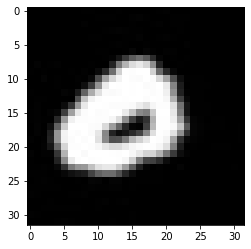

In [ ]:
plt.imshow(img) #plotting the image

In [ ]:
cv2.imread('/tmp/hwc/Train/O/_1_3.jpg').shape # gives (height, width, no.of colours(3 for rgb))

(32, 32, 3)

In [ ]:
cv2.imread('/tmp/hwc/Train/O/_1_157.jpg') # the rgb values vary from 0 to 2

array([[[2, 2, 2],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [2, 2, 2],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
train = ImageDataGenerator(rescale = 1/2) # making the rgb values to be between 0 to 1 to make calculation simple and easy
test = ImageDataGenerator(rescale = 1/2)

In [ ]:
train_dataset = train.flow_from_directory('/tmp/hwc/Train', target_size = (32,32), class_mode = 'categorical', batch_size = 32)  #loading the train directory
test_dataset = test.flow_from_directory('/tmp/hwc/Validation', target_size = (32,32), class_mode = 'categorical', batch_size = 20)
#resizing the images to a fixed pixel size, 'categorical as number of labels are >2, batch mode is number of images to be trained in single iteration, epoch is number of times the model is trained
#number of batches in each epoch

Found 26472 images belonging to 26 classes.
Found 7019 images belonging to 26 classes.


In [ ]:
train_dataset.class_indices # gives labels and their indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [ ]:
cnn_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (32,32,3)),
                                        tf.keras.layers.MaxPool2D(2,2), #it is a down sampling operation which reduces dimensionality of feature map using a filter(max pooling)
                                        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(), #converting pooled feature map into single long continous linear vector
                                        tf.keras.layers.Dense(512, activation = 'relu'), #it is a fully connected layer:,it classify the image based on flattened matrix, comes under output layer
                                        tf.keras.layers.Dense(26, activation = 'softmax')]) #26 - number of labels
#keras is neural network interface for tensorflow
#sequentials is plain stack of layers
#relu(rectified linear units) is a binary activation function which returns 0 for negative input and the number itself for positive input
#softmax is a extension of sigmoid function where it is used for categorical data
#apply a filter matrix over the image matrix and compute its dot product to detect patterns and get convolved feature as output ,the filter reduces the larger image matrix into smaller convolved matrix
#giving all the layers required as argument
#As you apply pooling, your data gets smaller and you can afford to have more channels
#deeper the layer gets the complexity of the
#repeating the layers to increase the number of channels (depth of convolutional matrices in cnn network)
#conv2D(number of layers, kernel size(height and width of filter matrix - any odd number), activation, input shape) and max pooling layer

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = SGD(learning_rate=0.001, momentum=0.9), metrics = ['accuracy'])
 #compile the model, loss function, optimizer function, metrics (what to be evaluated)
 #default loss for categorical data
 #lr is learning rate and momentum which is given using stochastic gradient descent

In [ ]:
model_fit = cnn_model.fit(train_dataset,
                          steps_per_epoch = 825, #total images/batch size, 825 to train entire dataset
                          epochs = 50, #change epochs to check if you can get better accuracy, it is number of cycles ,50 to train entire dataset
                          validation_data = test_dataset)
#trains the model epoch number of times and evaluate the model

Epoch 1/50
825/825 [==============================] - 35s 41ms/step - loss: 1.4394 - accuracy: 0.5855 - val_loss: 0.7371 - val_accuracy: 0.7762
Epoch 2/50
825/825 [==============================] - 35s 43ms/step - loss: 0.4565 - accuracy: 0.8563 - val_loss: 0.5408 - val_accuracy: 0.8384
Epoch 3/50
825/825 [==============================] - 32s 39ms/step - loss: 0.3315 - accuracy: 0.8934 - val_loss: 0.4653 - val_accuracy: 0.8600
Epoch 4/50
825/825 [==============================] - 34s 41ms/step - loss: 0.2697 - accuracy: 0.9106 - val_loss: 0.4418 - val_accuracy: 0.8628
Epoch 5/50
825/825 [==============================] - 35s 42ms/step - loss: 0.2228 - accuracy: 0.9249 - val_loss: 0.4271 - val_accuracy: 0.8694
Epoch 6/50
825/825 [==============================] - 37s 45ms/step - loss: 0.1948 - accuracy: 0.9334 - val_loss: 0.4852 - val_accuracy: 0.8628
Epoch 7/50
825/825 [==============================] - 34s 41ms/step - loss: 0.1723 - accuracy: 0.9380 - val_loss: 0.4311 - val_accuracy:

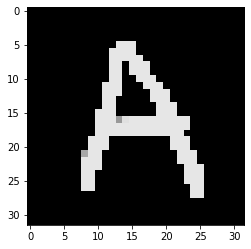

1/1 [==============================] - 0s 19ms/step
The predicted output is A 




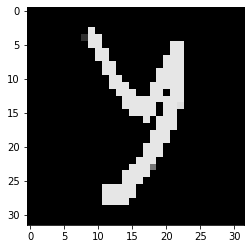

1/1 [==============================] - 0s 21ms/step
The predicted output is Y 




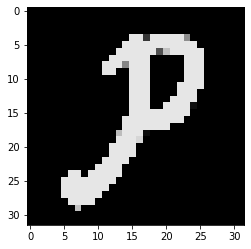

1/1 [==============================] - 0s 22ms/step
The predicted output is P 




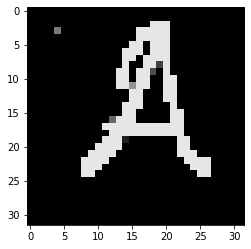

1/1 [==============================] - 0s 29ms/step
The predicted output is A 




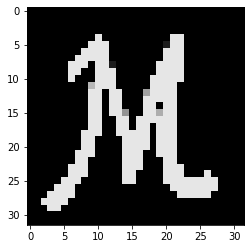

1/1 [==============================] - 0s 18ms/step
The predicted output is M 




In [ ]:
predict_directory = '/tmp/hwc/Test'  #test data set path
for i in os.listdir(predict_directory):
  img = image.load_img(predict_directory+'//'+i, target_size = (32,32,3))
  plt.imshow(img)
  plt.show()
  image_array = image.img_to_array(img) #converts image to numpy array
  image_array = np.expand_dims(image_array, axis = 0) #expand the dimension of the array and insert a new axis for the array
  array_of_images = np.vstack([image_array]) #it stack all the arrays of images into one single vertical array
  value = cnn_model.predict(array_of_images)  #predict the output
  d = train_dataset.class_indices
  for i in d:
    if d[i] == np.argmax(value[0]): #argmax gives index of maximum value of that array
      print('The predicted output is',i, '\n\n')

